<p align="center">
<img src="https://github.com/eeeeeedy/BGC/blob/main/assets/BCG_MONOGRAM.png?raw=true" alt = "BCG  icon" width="20%" height="20%">
</p>

# **Exploratory Data Analysis**
By [Edy Setiawan](https://github.com/eeeeeedy)

## Import packages

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python.

**Dataset Overview**

We have two datasets:

    Client Data: This dataset contains 26 variables including customer usage, sign-up date, and churn indicators.
    Price Data: This dataset contains 8 variables related to variable and fixed pricing data for each customer.

In [3]:
client_df = pd.read_csv(r'https://raw.githubusercontent.com/eeeeeedy/BGC/main/Task%202/client_data.csv')
price_df = pd.read_csv(r'https://raw.githubusercontent.com/eeeeeedy/BGC/main/Task%202/price_data.csv')

In [4]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [5]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, we will use `info()` method.

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [11]:
# Check the null values in Client Data
client_data_nulls = client_df.isnull().sum()

# Check the null values in Price Data
price_data_nulls = price_df.isnull().sum()

client_data_nulls, price_data_nulls


(id                                0
 channel_sales                     0
 cons_12m                          0
 cons_gas_12m                      0
 cons_last_month                   0
 date_activ                        0
 date_end                          0
 date_modif_prod                   0
 date_renewal                      0
 forecast_cons_12m                 0
 forecast_cons_year                0
 forecast_discount_energy          0
 forecast_meter_rent_12m           0
 forecast_price_energy_off_peak    0
 forecast_price_energy_peak        0
 forecast_price_pow_off_peak       0
 has_gas                           0
 imp_cons                          0
 margin_gross_pow_ele              0
 margin_net_pow_ele                0
 nb_prod_act                       0
 net_margin                        0
 num_years_antig                   0
 origin_up                         0
 pow_max                           0
 churn                             0
 dtype: int64,
 id                    

**Observations:**

    Client Data:
    - 14,606 entries with 26 columns.
    - No missing values in any column.
    - Different data types: integers, floats, and objects (likely categorical or date variables).

    Price Data:
    - 193,002 entries with 8 columns.
    - No missing values in any column.
    - Floats and objects (likely IDs and date variables).

---
### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [8]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Since we have a good understanding of the data types and missing values, let's proceed to check the statistical summaries and distributions of some key variables.

---

## Data visualization

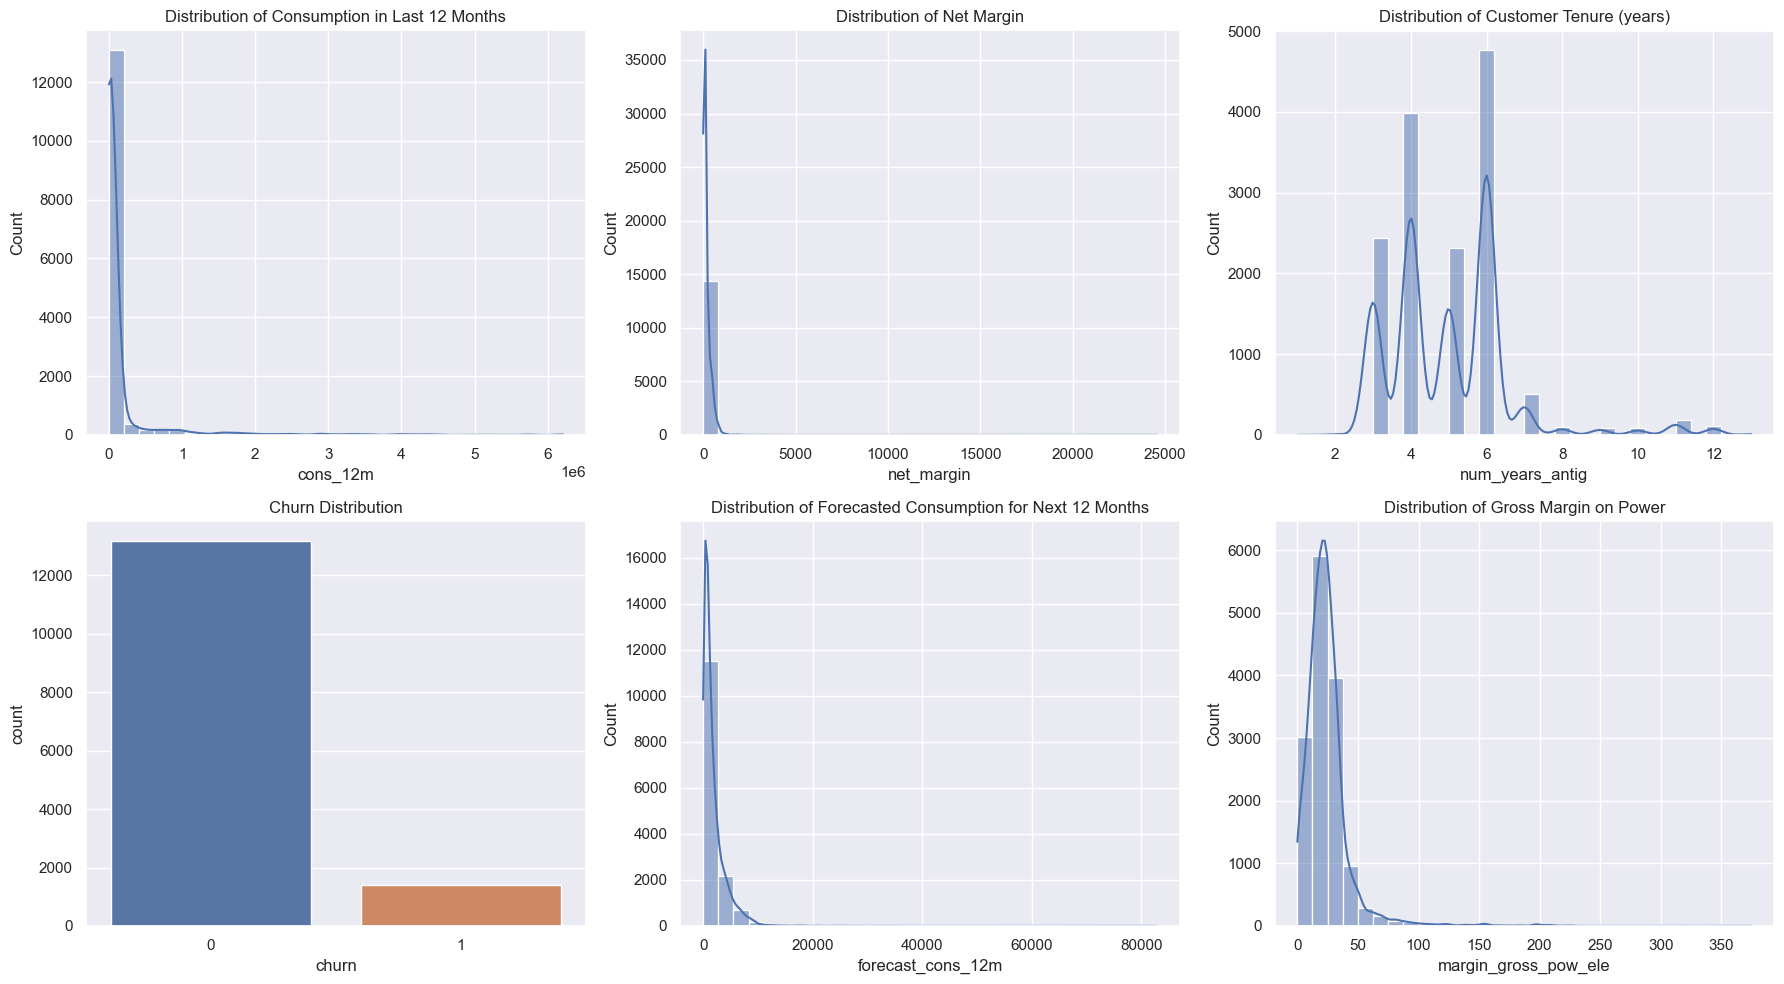

In [13]:
# Plotting distributions for key variables in Client Data

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(client_df['cons_12m'], bins=30, ax=axes[0, 0], kde=True)

axes[0, 0].set_title('Distribution of Consumption in Last 12 Months')

sns.histplot(client_df['net_margin'], bins=30, ax=axes[0, 1], kde=True)

axes[0, 1].set_title('Distribution of Net Margin')

sns.histplot(client_df['num_years_antig'], bins=30, ax=axes[0, 2], kde=True)

axes[0, 2].set_title('Distribution of Customer Tenure (years)')

sns.countplot(x='churn', data=client_df, ax=axes[1, 0])

axes[1, 0].set_title('Churn Distribution')

sns.histplot(client_df['forecast_cons_12m'], bins=30, ax=axes[1, 1], kde=True)

axes[1, 1].set_title('Distribution of Forecasted Consumption for Next 12 Months')

sns.histplot(client_df['margin_gross_pow_ele'], bins=30, ax=axes[1, 2], kde=True)

axes[1, 2].set_title('Distribution of Gross Margin on Power')

plt.tight_layout()

plt.show()


**Statistical Summary Observations:**

Client Data :

- Variables like cons_12m and cons_last_month have a wide range, indicating high variability in consumption.
- net_margin and margin_gross_pow_ele could be indicators of profitability.
- num_years_antig suggests varying customer tenure.
- The churn distribution indicates that the dataset is imbalanced, with fewer churn instances.

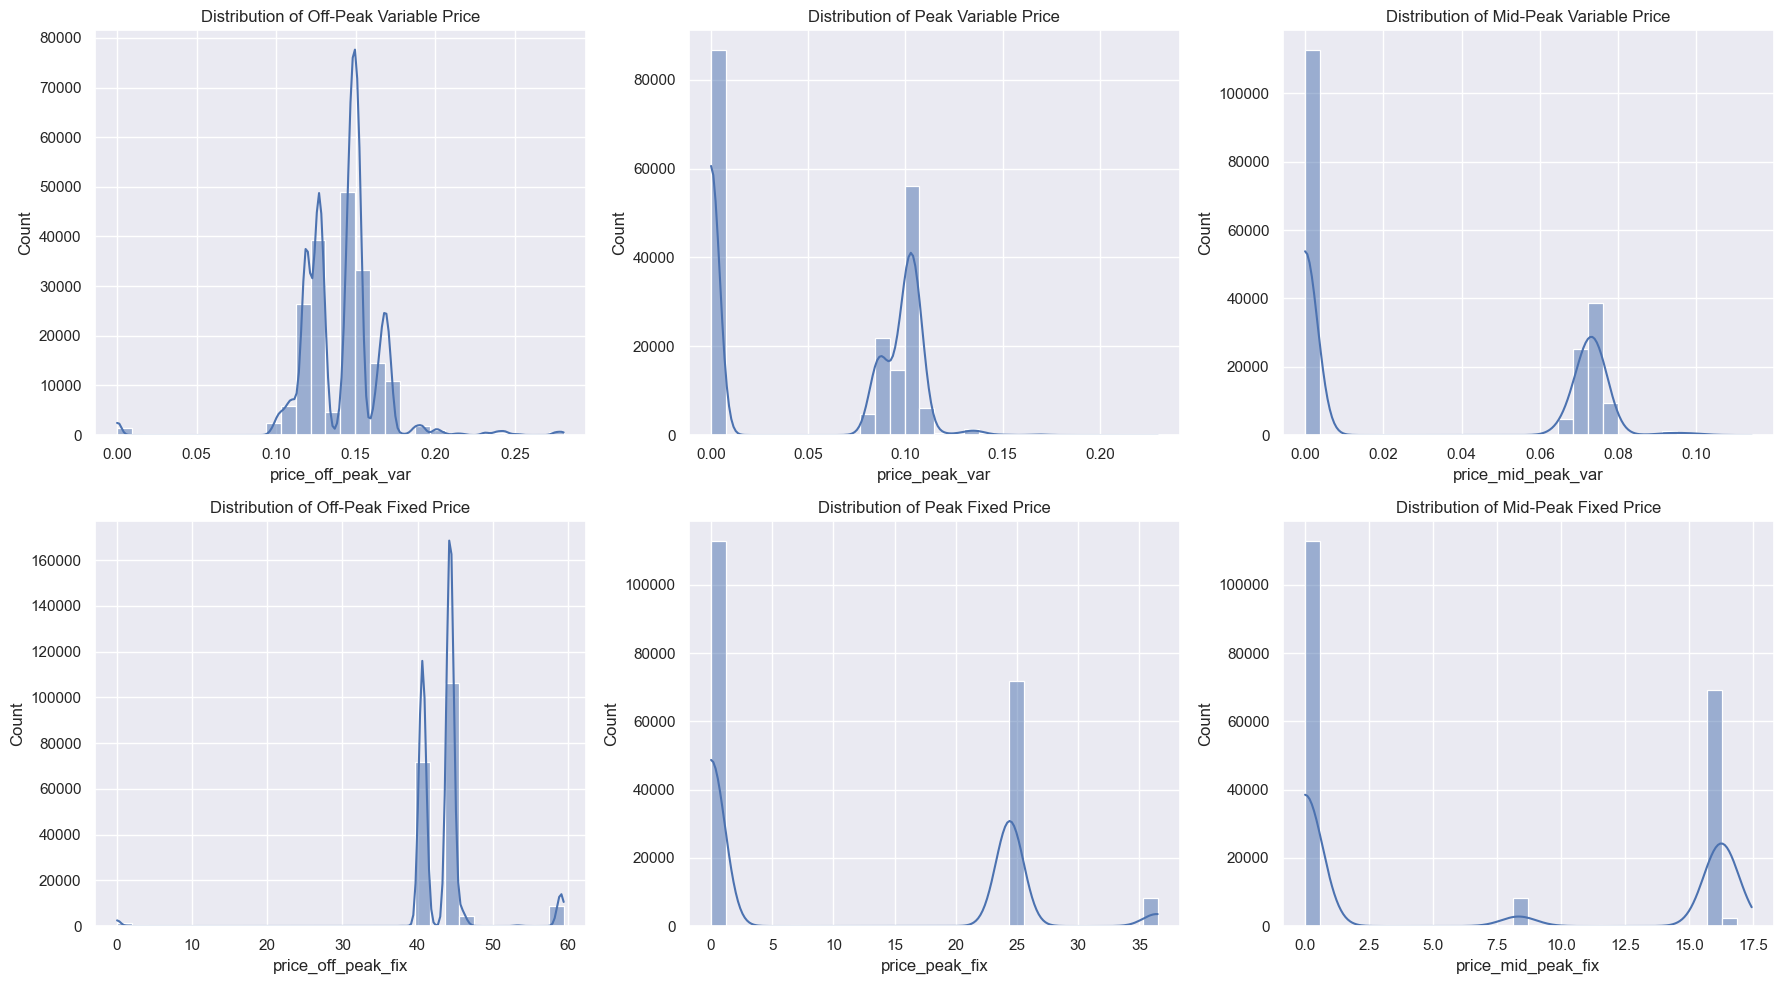

In [15]:
# Plotting distributions for key variables in Price Data
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot distribution of 'price_off_peak_var'
sns.histplot(price_df['price_off_peak_var'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Off-Peak Variable Price')

# Plot distribution of 'price_peak_var'
sns.histplot(price_df['price_peak_var'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of Peak Variable Price')

# Plot distribution of 'price_mid_peak_var'
sns.histplot(price_df['price_mid_peak_var'], bins=30, ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Distribution of Mid-Peak Variable Price')

# Plot distribution of 'price_off_peak_fix'
sns.histplot(price_df['price_off_peak_fix'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of Off-Peak Fixed Price')

# Plot distribution of 'price_peak_fix'
sns.histplot(price_df['price_peak_fix'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of Peak Fixed Price')

# Plot distribution of 'price_mid_peak_fix'
sns.histplot(price_df['price_mid_peak_fix'], bins=30, ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Distribution of Mid-Peak Fixed Price')

plt.tight_layout()
plt.show()


**Statistical Summary Observations:**

Price Data :

- Off-Peak Variable Price: The distribution is somewhat normal but skewed towards the right.
- Peak Variable Price: The distribution has a significant peak at zero, indicating that many records have zero peak variable price.
- Mid-Peak Variable Price: Similar to peak variable price, it also has a significant peak at zero.
- Off-Peak Fixed Price: The distribution is less varied and centered around 40-45 units.
- Peak Fixed Price: Many records have a zero peak fixed price, with another peak around 25 units.
- Mid-Peak Fixed Price: Most of the records have a mid-peak fixed price of zero, with another smaller peak around 15-17 units.

---

## Price Sensitivity Hypothesis

To explore the hypothesis that price sensitivity is correlated with customer churn, we'll define a metric for price sensitivity.
Defining Price Sensitivity

Price Sensitivity can be defined as the percentage change in consumption for a one percent change in price. 

Mathematically, it can be represented as:

***Price Sensitivity = (Change in PriceChange in Consumption / Change in Price ​)×100***


To calculate this, we'll first merge the client and price data on the 'id' column. Then we'll calculate the price sensitivity for each customer and check its correlation with churn.

In [18]:
# Merge the client data and price data on 'id'
merged_data = pd.merge(client_df, price_df, on='id', how='inner')

# Calculate the average price for each customer
merged_data['avg_price'] = (merged_data['price_off_peak_var'] + merged_data['price_peak_var'] + merged_data['price_mid_peak_var']) / 3

# Group by customer 'id' and calculate the mean for consumption and average price
grouped_data = merged_data.groupby('id').agg({'cons_12m': 'mean', 'avg_price': 'mean', 'churn': 'max'}).reset_index()

# Calculate the percentage change in consumption and average price
grouped_data['pct_change_cons'] = grouped_data['cons_12m'].pct_change() * 100
grouped_data['pct_change_price'] = grouped_data['avg_price'].pct_change() * 100

# Remove infinite values and NaNs generated by pct_change
grouped_data.replace([np.inf, -np.inf], np.nan, inplace=True)
grouped_data.dropna(inplace=True)

# Calculate Price Sensitivity
grouped_data['price_sensitivity'] = (grouped_data['pct_change_cons'] / grouped_data['pct_change_price'])

# Check the correlation between 'price_sensitivity' and 'churn'
correlation_matrix = grouped_data[['price_sensitivity', 'churn']].corr()

correlation_matrix

,price_sensitivity,churn
price_sensitivity,1.000000,0.000591
churn,0.000591,1.000000


**Observations:**

The correlation between price_sensitivity and churn is approximately 0.0006, which is very close to zero. This indicates that there's no significant correlation between price sensitivity and churn based on the provided dataset.

---

Certainly, let's explore another way to analyze the relationship between price sensitivity and churn. This time, we can consider a different approach:

    1. Calculate the average prices for each customer in the price data.
    2. Merge this average price information with the client data.
    3. Explore correlations between this new price feature, existing features, and churn.

In [19]:
# Step 1: Calculate the average prices for each customer in the price data
# Calculate the average price for each customer
price_df['avg_price'] = (price_df['price_off_peak_var'] + price_df['price_peak_var'] + price_df['price_mid_peak_var']) / 3

# Group by customer 'id' and calculate the mean average price
grouped_price_df = price_df.groupby('id').agg({'avg_price': 'mean'}).reset_index()

# Step 2: Merge this average price information with the client data
# Merge the client data and the grouped price data on 'id'
merged_client_price_df = pd.merge(client_df, grouped_price_df, on='id', how='inner')

# Step 3: Explore correlations between this new price feature, existing features, and churn
# Calculate the correlation matrix including 'avg_price' and 'churn'
correlation_matrix_new = merged_client_price_df.corr()[['avg_price', 'churn']].sort_values(by='churn', ascending=False)

correlation_matrix_new

C:\Users\Edy Setiawan\AppData\Local\Temp\ipykernel_15108\2199625730.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_new = merged_client_price_df.corr()[['avg_price', 'churn']].sort_values(by='churn', ascending=False)


,avg_price,churn
churn,0.040354,1.000000
margin_net_pow_ele,0.231472,0.095772
margin_gross_pow_ele,0.231444,0.095725
forecast_meter_rent_12m,0.739317,0.044245
net_margin,0.237156,0.041135
avg_price,1.000000,0.040354
pow_max,0.419040,0.030362
forecast_price_energy_peak,0.964267,0.029315
forecast_discount_energy,0.117990,0.017026
forecast_price_pow_off_peak,-0.131540,0.014778


**Observations:**

After calculating the average price for each customer and merging it with the client data, the correlation matrix shows:

    - The correlation between the newly calculated avg_price and churn is approximately 0.0403, which is still relatively low but slightly more significant compared to the earlier calculated price sensitivity.
    - Other features like margin_net_pow_ele, margin_gross_pow_ele, and forecast_meter_rent_12m show slightly higher correlations with churn, ranging from 0.044 to 0.096.
    - The correlation between avg_price and some other features such as forecast_price_energy_peak is quite high (0.964), indicating that this new feature may not be providing completely independent information.

Although the correlation between avg_price and churn is not strong, it's worth including in the churn model for further exploration. Given the correlations with other features, we might also consider feature engineering or dimensionality reduction techniques like PCA in later stages.